# Titanic Survival

In [53]:
# Notwendige Bibliotheken importieren
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [54]:
# Lade die Daten
train = pd.read_csv('train.csv')

In [55]:
train.head()  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
# Vereinfachtes Feature-Engineering
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Verwenden Sie Zuweisung anstelle von inplace=True, um FutureWarnings zu vermeiden
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')

# Verwendung von .fillna() mit Zuweisung für 'Fare'
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())

# Zuordnung kategorischer Variablen zu ganzen Zahlen
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0}).astype(int)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping).astype(int)

In [57]:
# Vorbereiten der Daten für die Modellierung
X = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = train['Survived']

In [58]:
# Aufteilung der Daten in Trainings- und Testsätze
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Definieren und Anpassen des Entscheidungsbaummodells
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

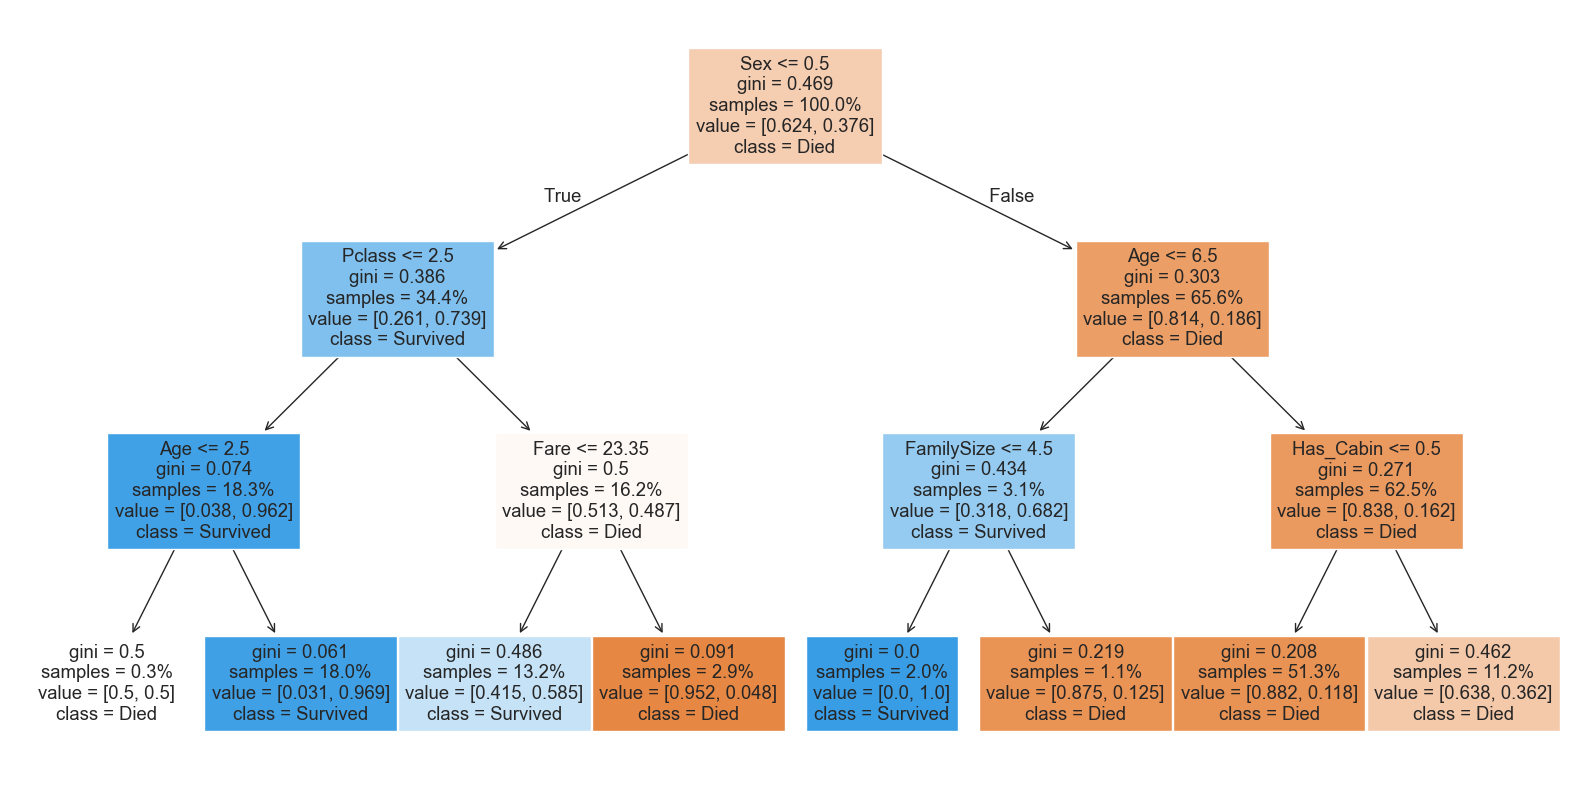

In [60]:
# Visualisierung des Entscheidungsbaums
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['Died', 'Survived'], proportion=True)
plt.show()

In [79]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy (Genauigkeit) des Klassifikators bei den Testdaten: {accuracy:.2f}")

Accuracy (Genauigkeit) des Klassifikators bei den Testdaten: 0.80


# Klassifikationsmetriken

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [63]:
# Vorhersagen für den Testsatz treffen
y_pred = model.predict(X_test)

### Konfusionsmatrix und manuelle Berechnung

In [64]:
# Berechne die Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)

In [65]:
cm

array([[92, 13],
       [23, 51]])

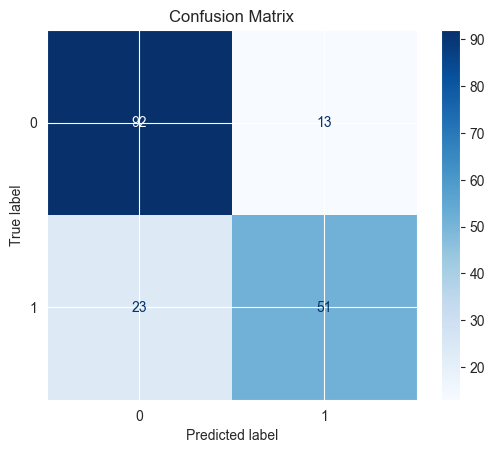

In [66]:
# Zeichne die Konfusionsmatrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [67]:
# Berechne die Genauigkeit manuell
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.80


In [68]:
# Berechne die Precision, den Recall und den F1-Wert.
precision = precision_score(y_test, y_pred, average='binary')  # for binary classification
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Drucken der zusätzlichen Metriken
print(f"Precision on the test set: {precision:.2f}")
print(f"Recall on the test set: {recall:.2f}")
print(f"F1 Score on the test set: {f1:.2f}")

Precision on the test set: 0.80
Recall on the test set: 0.69
F1 Score on the test set: 0.74


### Klassifikationsreport

Die Ausgabe enthält:

* Precision: Der Anteil der korrekten Vorhersagen einer Klasse im Verhältnis zu allen Vorhersagen dieser Klasse.
* Recall: Der Anteil der korrekten Vorhersagen einer Klasse im Verhältnis zu allen tatsächlichen Fällen dieser Klasse in den Daten.
* F1-Score: Der harmonische Mittelwert aus Precision und Recall.
* Support: Die Anzahl der tatsächlichen Vorkommen jeder Klasse in y_test.

In [69]:
# Berechnen der Metriken für jede Klasse und zusammengefasst
report = classification_report(y_test, y_pred, target_names=['Gestorben', 'Überlebt'])

# Drucken des Berichts
print(report)

              precision    recall  f1-score   support

   Gestorben       0.80      0.88      0.84       105
    Überlebt       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



Die Begriffe "macro avg" und "weighted avg" in der Ausgabe von classification_report sind zwei verschiedene Arten, wie Durchschnittswerte für Precision, Recall und den F1-Score über die verschiedenen Klassen hinweg berechnet werden. 

Macro Average (Makro-Durchschnitt)
* Macro Average berechnet den Durchschnitt der Metriken, indem es jede Klasse gleich behandelt, unabhängig von ihrer Häufigkeit (Support). Das bedeutet, dass alle Klassen das gleiche Gewicht in der Berechnung erhalten.
* Beispiel: Wenn du zwei Klassen hast, bei denen Klasse 1 in 95% der Daten vorkommt und Klasse 2 nur in 5%, wird jeder Klasse in der Berechnung des Macro Average der gleiche Stellenwert zugeschrieben.

Weighted Average (Gewichteter Durchschnitt)
* Weighted Average berechnet den Durchschnitt der Metriken, indem es die Unterstützung (Support) jeder Klasse als Gewicht verwendet. Das bedeutet, dass Klassen, die häufiger vorkommen, stärker in die Berechnung einfließen.
* Beispiel: Hierbei wird die Tatsache berücksichtigt, dass einige Klassen mehr Beispiele in den Daten haben als andere, was einen realistischeren Einblick in die Leistung des Modells in Bezug auf die tatsächliche Datenverteilung bietet.

### ROC Kurve

In [70]:
# Stelle sicher, dass das Modell Wahrscheinlichkeiten schätzen kann, wenn es nicht von Haus aus dazu in der Lage ist (wie z. B. einige SVMs).
y_scores = model.predict_proba(X_test)[:, 1]  # die Wahrscheinlichkeitsschätzungen für die positive Klasse erhalten

In [71]:
y_scores

array([0.11780822, 0.11780822, 0.11780822, 0.96875   , 0.58510638,
       0.96875   , 0.58510638, 0.11780822, 0.58510638, 0.96875   ,
       0.3625    , 0.11780822, 0.04761905, 0.11780822, 0.11780822,
       0.96875   , 0.3625    , 0.58510638, 0.11780822, 0.3625    ,
       0.11780822, 0.11780822, 0.58510638, 0.11780822, 0.11780822,
       0.11780822, 0.11780822, 0.11780822, 0.125     , 0.58510638,
       0.11780822, 0.58510638, 0.11780822, 0.58510638, 0.11780822,
       0.11780822, 0.3625    , 0.58510638, 0.96875   , 0.11780822,
       0.11780822, 0.11780822, 0.11780822, 0.11780822, 0.58510638,
       0.11780822, 0.11780822, 0.11780822, 0.11780822, 0.3625    ,
       0.58510638, 0.96875   , 0.11780822, 0.3625    , 0.11780822,
       0.96875   , 0.11780822, 0.96875   , 0.96875   , 0.58510638,
       0.11780822, 0.96875   , 0.96875   , 0.11780822, 0.11780822,
       0.96875   , 0.11780822, 0.11780822, 0.11780822, 0.96875   ,
       0.96875   , 0.96875   , 0.3625    , 0.96875   , 0.11780

In [72]:
# Berechne die Punkte der ROC-Kurve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [73]:
thresholds

array([       inf, 1.        , 0.96875   , 0.58510638, 0.3625    ,
       0.125     , 0.11780822, 0.04761905])

In [74]:
tpr

array([0.        , 0.01351351, 0.5       , 0.68918919, 0.82432432,
       0.82432432, 0.97297297, 1.        ])

In [75]:
fpr

array([0.        , 0.        , 0.03809524, 0.12380952, 0.22857143,
       0.23809524, 0.96190476, 1.        ])

In [76]:
# Berechne die AUC
roc_auc = auc(fpr, tpr)

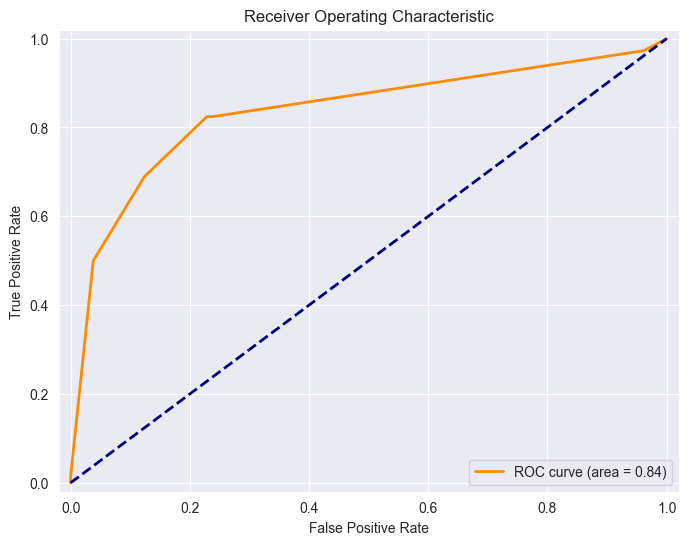

In [77]:
# Zeichne die ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Achte auf das "Knie" der Kurve: Dies ist in der Regel der Punkt, an dem Sie ein gutes Gleichgewicht zwischen TPR und FPR erreichen. In unserer Kurve scheint der Knick irgendwo bei einer FPR von 0,2 aufzutauchen, wo die TPR etwa 0,8 beträgt. Dieser Bereich könnte ein guter Kandidat für den Schwellenwert sein, wenn wir ein Gleichgewicht zwischen Sensitivität und Spezifität anstreben.

In [78]:
# Angenommen, fpr, tpr und Schwellenwerte sind bereits berechnet. Finde den Schwellenwert, der dem gewünschten FPR von 0,2 am nächsten kommt.
target_fpr = 0.2
closest_index = np.argmin(np.abs(fpr - target_fpr))  # Index des FPR, der dem Ziel am nächsten liegt
optimal_threshold = thresholds[closest_index]
print(f"Optimal threshold at FPR {fpr[closest_index]:.2f} is {optimal_threshold:.2f}")

Optimal threshold at FPR 0.23 is 0.36
